In [1]:
import datetime as dt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

## "`fetch_historical_bus_locations.py`" fetchs raw  bus location data from TriMet via "db4iot", a web service that houses historical TriMet data since August 18, 2016

In [2]:
sample1 = pd.read_json('data/bus4_trip1478to7751/daily/bus_4_2016-08-18_1478to7751_first_stop_approaching.json')
sample2 = pd.read_json('data/bus4_trip1478to7751/daily/bus_4_2016-08-18_1478to7751_first_stop_leaving.json')
sample3 = pd.read_json('data/bus4_trip1478to7751/daily/bus_4_2016-08-18_1478to7751_last_stop_approaching.json')
sample4 = pd.read_json('data/bus4_trip1478to7751/daily/bus_4_2016-08-18_1478to7751_last_stop_leaving.json')

samples = pd.concat([sample1, sample2, sample3, sample4])
samples.sample(5).sort_values('event_timestamp').T

,120,22,40,89,168
bearing,20,269,269,358,21
blockID,437,436,437,436,946
delay,35,95,90,-16,-610
device_id,2270,3010,2270,3010,2518
direction,1,1,1,1,1
event_day,2016-08-18,2016-08-18,2016-08-18,2016-08-18,2016-08-18
event_timestamp,1471524873,1471549773,1471558779,1471568052,1471573414
event_timestamp_str,2016-08-18 05:54:33,2016-08-18 12:49:33,2016-08-18 15:19:39,2016-08-18 17:54:12,2016-08-18 19:23:34
expires,2053-11-09 10:26:08,2016-08-18 20:19:33,2054-12-06 20:46:08,2016-08-19 01:24:12,2055-05-25 05:12:48
first_stop,1478,1478,1478,1478,1478


## "`find_completed_routes.py`" extracts the duration of all observed bus trips for a given "commute" 

In [64]:
bus4 = pd.read_pickle('data/completed_bus_routes-bus4.pickle')
bus19 = pd.read_pickle('data/completed_bus_routes-bus19.pickle')

In [65]:
#bus4 = bus4[bus4.time_of_day >= 40000]
bus4 = bus4[bus4.duration < bus4.duration.quantile(0.95)]
bus4 = bus4[bus4.duration > bus4.duration.quantile(0.05)]
bus4 = bus4[bus4.trip_start.dt.weekday.isin([0,1,2,3,4,5])]

bus4['trip_start_timestamp'] = bus4.trip_start.apply(lambda t: dt.datetime(1900, 1, 1, t.hour, t.minute, 0))
bus4['weekday_num'] = bus4.trip_start.dt.weekday

In [66]:
#bus19 = bus19[bus19.time_of_day >= 40000]
bus19 = bus19[bus19.duration < bus19.duration.quantile(0.95)]
bus19 = bus19[bus19.duration > bus19.duration.quantile(0.05)]
bus4 = bus19[bus19.trip_start.dt.weekday.isin([0,1,2,3,4,5])]

bus19['trip_start_timestamp'] = bus19.trip_start.apply(lambda t: dt.datetime(1900, 1, 1, t.hour, t.minute, 0))
bus19['weekday_num'] = bus19.trip_start.dt.weekday

In [67]:
bus4.duration.describe()

count                      3519
mean     0 days 00:43:43.684285
std      0 days 00:03:47.606202
min             0 days 00:34:36
25%             0 days 00:41:24
50%             0 days 00:44:03
75%             0 days 00:46:24
max             0 days 00:51:03
Name: duration, dtype: object

In [68]:
bus19.duration.describe()

count                      3725
mean     0 days 00:43:35.008859
std      0 days 00:03:46.236300
min             0 days 00:34:36
25%             0 days 00:41:09
50%             0 days 00:43:52
75%             0 days 00:46:15
max             0 days 00:51:03
Name: duration, dtype: object

In [69]:
bus19_simple = bus19[['hour', 'duration_minutes']]

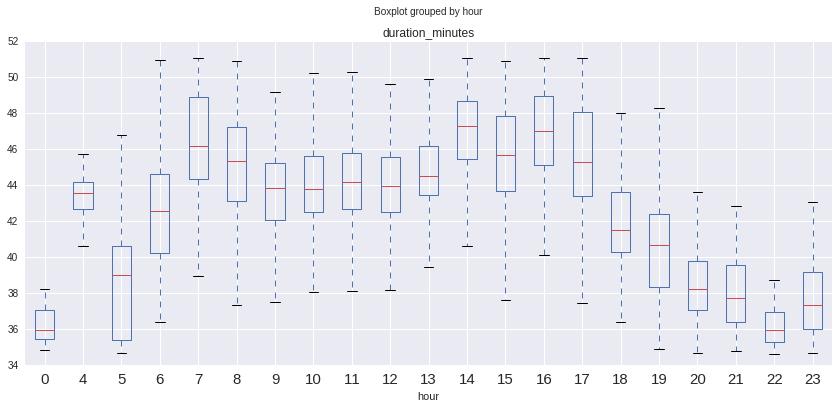

In [70]:
bus4.boxplot(column=['duration_minutes'], by='hour', figsize=(14, 6), rot=0, fontsize=15)

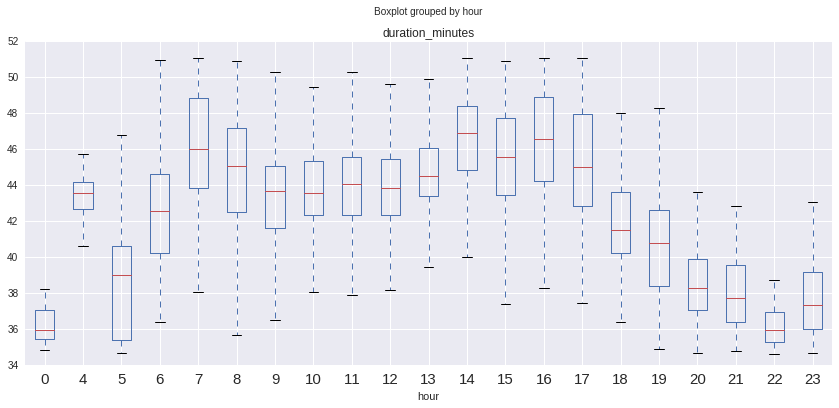

In [71]:
bus19.boxplot(column=['duration_minutes'], by='hour', figsize=(14, 6), rot=0, fontsize=15)

TypeError: boxplot() got an unexpected keyword argument 'subplot'

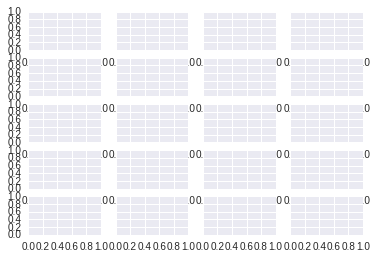

In [40]:
plt.figure(figsize=(14,8))
by_hour = bus19_simple.groupby('hour')#.boxplot('duration_minutes', return_type='axes')
by_hour.boxplot(column='duration_minutes', rot=90, return_type='axes', subplot=False)

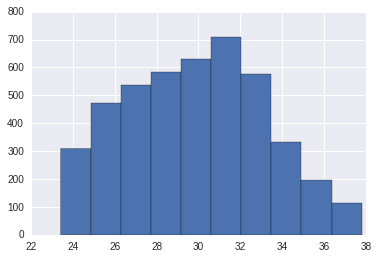

In [8]:
bus4.duration_minutes.hist() 

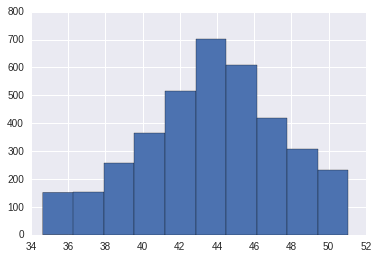

In [9]:
bus19.duration_minutes.hist()

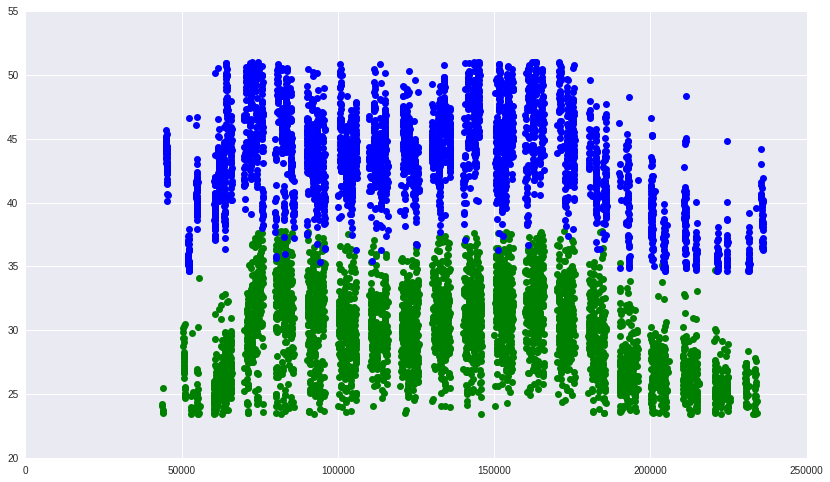

In [19]:
plt.figure(figsize=(14,8))
plt.plot(bus4.time_of_day, bus4.duration_minutes, 'go')
plt.plot(bus19.time_of_day, bus19.duration_minutes, 'bo')


In [ ]:
plot(bus19.hour, bus19.duration_minutes, 'o')

In [ ]:
sns.barplot(bus4.weekday_num+1, bus4.duration_minutes)

In [ ]:
sns.barplot(bus19.weekday_num+1, bus19.duration_minutes)

In [ ]:
all_trips = pd.concat([bus4, bus19])

In [ ]:
plt.boxplot

In [ ]:
all_trips.pivot_table(index='hour', columns='routeNumber', values=['duration_minutes'], aggfunc='mean')

In [ ]:
df = bus4

In [ ]:
df.columns

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number])

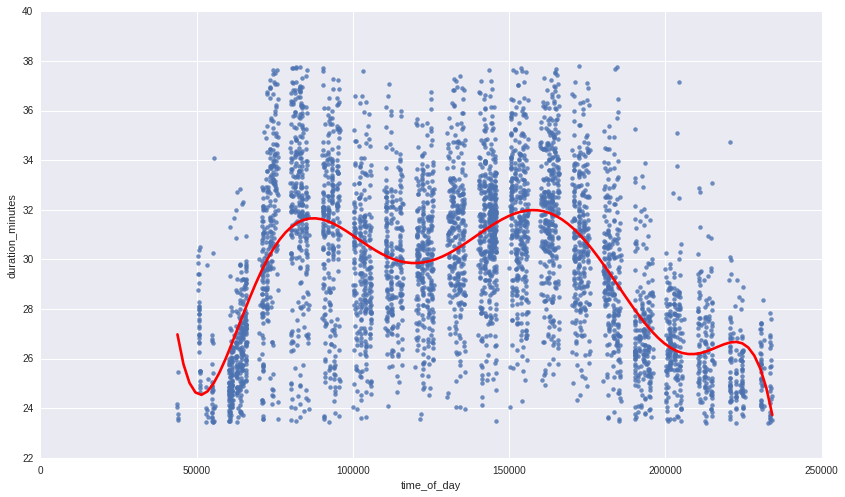

In [12]:
plt.figure(figsize=(14,8))
sns.regplot("time_of_day", "duration_minutes", bus4, ci=None, truncate=True, fit_reg=True,  order=7,  line_kws={'color': 'r'})

In [ ]:
plt.figure(figsize=(14,8))
sns.regplot("time_of_day", "duration_minutes", bus19, ci=None, truncate=True, fit_reg=True, order=7, line_kws={'color': 'r'})

In [ ]:
sns.regplot("delay_start", "duration_minutes", bus4, fit_reg=False)

In [ ]:
# Can we predict the time of trip based on the Delay at the time of trip start? Or even from a few stops back?

In [ ]:
((df.duration.dt.seconds + df.delay)/60).hist()

In [ ]:
((df.duration.dt.seconds + df.delay)/60).describe()

### Should the tripID for the start and end stop be the same? Can we group on tripID instead of vehicleID in `find_completed_routes.py` ?

### Can we create a model that uses 3 input variables? Delay at starting bus stop, weekday, time of day.

### What are the current variations in commute times that we can use for a baseline, before construction?

### What time should I board the bus? 

Based on estimated route length. Is it better to leave 30 min later? Should I convince my bos to let me avoid rushhour?

Plot how long the trip took, against how long it was "suppose" to take at that given time of day. (by subtracting the delay)

In [ ]:
from sklearn import linear_model

In [ ]:
data = bus4
#length = len(data)
#x = bus4.time_of_day.values.reshape(length, 1)
#y = bus4.duration_minutes.values.reshape(length, 1)

In [ ]:
X = data[['time_of_day']]
Y = data['duration_minutes']

X_train=data.sample(frac=0.8,random_state=200)
X_test=data.drop(train.index)

In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
result = reg.fit(X, Y)

In [ ]:
plot(X, Y, 'o')
plot(X, result.predict(X), 'g')

In [ ]:
result.score(X, result.predict(X))

### methods to try:

`df.cov` # (co-variance?)

`df.var`

heatmap for showing missing data

mossaic plot?

confusion matrix

try answering some questions about python datetimes, panda datetimes in Stack Overflowsi

lookup 'residuals' and qqplot

rolling average plot

"size()" on groupby obj

data science is multi-discplinary!

In [ ]:
bus4.trip_end.size

In [ ]:
bus4.groupby('hour').size()